In [49]:
# Packages and dependencies
from ipywidgets import *
import pandas as pd
import glob
import numpy as np
import os
import re
import json
import requests
import csv
import requests
from io import StringIO 
import gzip

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

In [47]:
enc = pd.read_csv('/Users/Carol/Desktop/arquivoNovo/encode_final_cleaned.csv')

enc.head()

,Unnamed: 0,description,TF,cell,gene,organism,Encode,CreedsDN,pval16DN,Overlap16DN,...,lg10dn15,pval15BFup,pval15FDRup,pval15BFdn,pval15FDRdn,lg10dn16,lg10up16,zscore15dn,zscore15up,zscore15total
0,1,ARID3A_HepG2_1337_hg19,ARID3A,HepG2,1337,hg19,2000,305,1.0,0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-14.469586,-15.885645,-30.355231
1,2,ARID3A_HepG2_1338_hg19,ARID3A,HepG2,1338,hg19,2000,352,1.0,0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-14.469586,-15.885645,-30.355231
2,3,ARID3A_HepG2_1339_hg19,ARID3A,HepG2,1339,hg19,2000,301,1.0,0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-14.469586,-15.885645,-30.355231
3,4,ARID3A_K562_1337_hg19,ARID3A,K562,1337,hg19,2000,305,1.0,0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-14.469586,-15.885645,-30.355231
4,5,ARID3A_K562_1338_hg19,ARID3A,K562,1338,hg19,2000,352,1.0,0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,-14.469586,-15.885645,-30.355231


In [48]:
enc.describe()

,Unnamed: 0,gene,Encode,CreedsDN,pval16DN,Overlap16DN,overlap16UP,pval16UP,totalEncode16,CreedsDN.1,...,lg10dn15,pval15BFup,pval15FDRup,pval15BFdn,pval15FDRdn,lg10dn16,lg10up16,zscore15dn,zscore15up,zscore15total
count,411.00000,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.000000,4.110000e+02,411.000000,410.000000,...,410.000000,4.110000e+02,4.110000e+02,4.100000e+02,4.100000e+02,411.000000,411.000000,4.110000e+02,4.110000e+02,4.110000e+02
mean,206.00000,1351.817518,1907.326034,291.041363,7.839571e-01,11.267640,12.099757,7.966098e-01,23.367397,291.058537,...,-1.283754,8.786888e-01,8.175022e-01,9.006963e-01,8.297355e-01,-0.732136,-0.645575,-4.395511e-14,3.270917e-14,-1.325136e-14
std,118.78973,943.982631,376.170409,85.028005,3.743358e-01,18.329409,19.718192,3.658915e-01,33.955837,85.131174,...,5.209888,3.166626e-01,3.757994e-01,2.938162e-01,3.627477e-01,2.373526,1.881880,2.869343e+01,3.013553e+01,4.621488e+01
min,1.00000,31.000000,0.000000,24.000000,8.500000e-29,0.000000,0.000000,1.100000e-16,0.000000,24.000000,...,-82.721246,8.631000e-27,8.631000e-27,7.790000e-81,7.790000e-81,-28.070581,-15.958607,-1.446959e+01,-1.588564e+01,-3.035523e+01
25%,103.50000,359.000000,2000.000000,259.500000,7.100000e-01,0.000000,0.000000,8.000000e-01,0.000000,259.250000,...,-0.110725,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-0.148914,-0.096910,-1.446959e+01,-1.588564e+01,-3.035523e+01
50%,206.00000,1333.000000,2000.000000,286.000000,1.000000e+00,0.000000,0.000000,1.000000e+00,1.000000,286.000000,...,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,-1.446959e+01,-1.588564e+01,-3.035523e+01
75%,308.50000,2034.000000,2000.000000,320.000000,1.000000e+00,20.000000,22.500000,1.000000e+00,50.000000,320.000000,...,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,5.530414e+00,8.114355e+00,1.814477e+01
max,411.00000,3118.000000,2000.000000,600.000000,1.000000e+00,108.000000,93.000000,1.000000e+00,127.000000,600.000000,...,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,2.785304e+02,2.681144e+02,2.896448e+02


In [56]:
# plt.scatter(enc.pval16DN, enc.pval16UP)
# plt.xlabel("pval16DN")
# plt.ylabel("pval16UP")
# plt.tight_layout()


In [57]:
# plt.scatter(enc.pval16UP, enc.pval15BFdn)
# plt.xlabel("pval15BFup")
# plt.ylabel("pval15BFdn")
# plt.tight_layout()

# ENCODE 2015

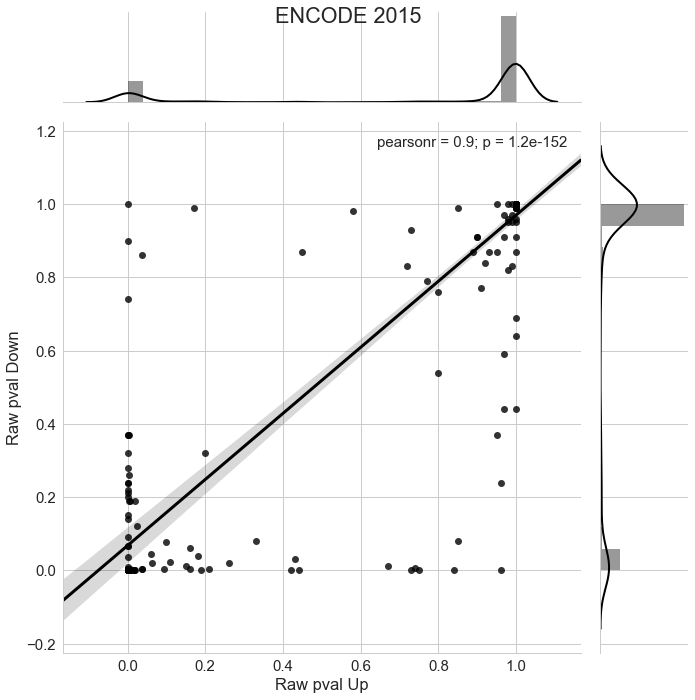

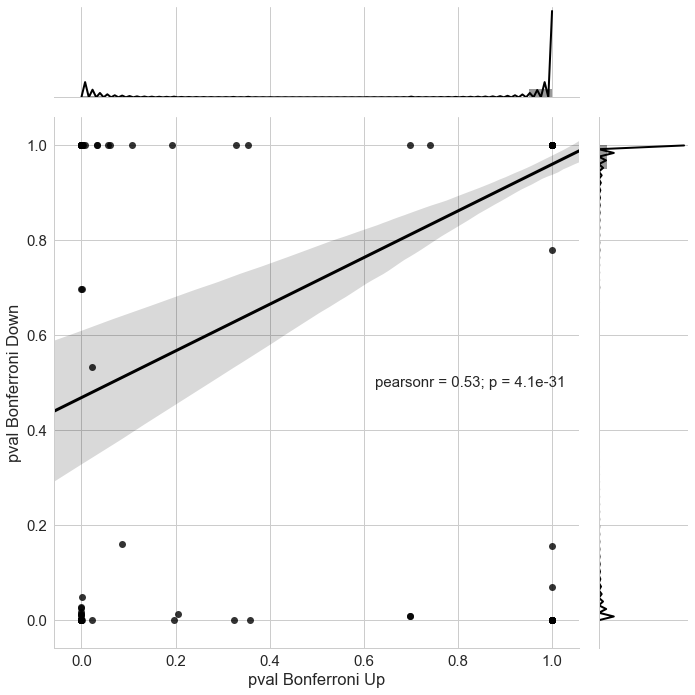

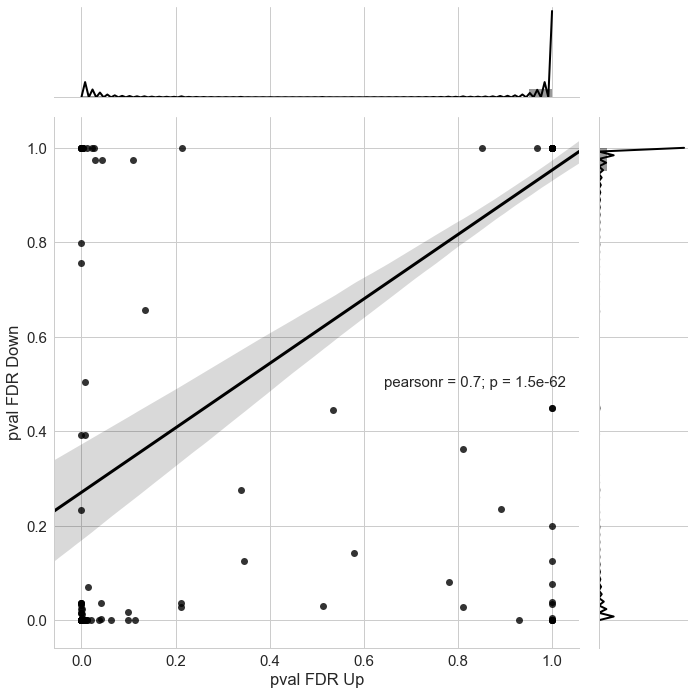

In [145]:
#fig, axs = plt.subplots(1,2)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_style("whitegrid")

sns.jointplot('pval15UP', 'pval15DN', data=enc, kind="reg", color='k', size=10 ,) 
plt.xlabel("Raw pval Up")
plt.ylabel("Raw pval Down") 
sns.plt.suptitle('ENCODE 2015')
plt.tight_layout()


sns.jointplot('pval15BFup', 'pval15BFdn', data=enc, kind="reg",color=
             'k', size=10,  ) 
plt.xlabel("pval Bonferroni Up")
plt.ylabel("pval Bonferroni Down") 
plt.tight_layout()


sns.jointplot('pval15FDRup', 'pval15FDRdn', data=enc, kind="reg",color=
             'k',size=10, ) 
plt.xlabel("pval FDR Up")
plt.ylabel("pval FDR Down") 
plt.tight_layout()


In [106]:
#plt.style.available

# ENCODE 2016

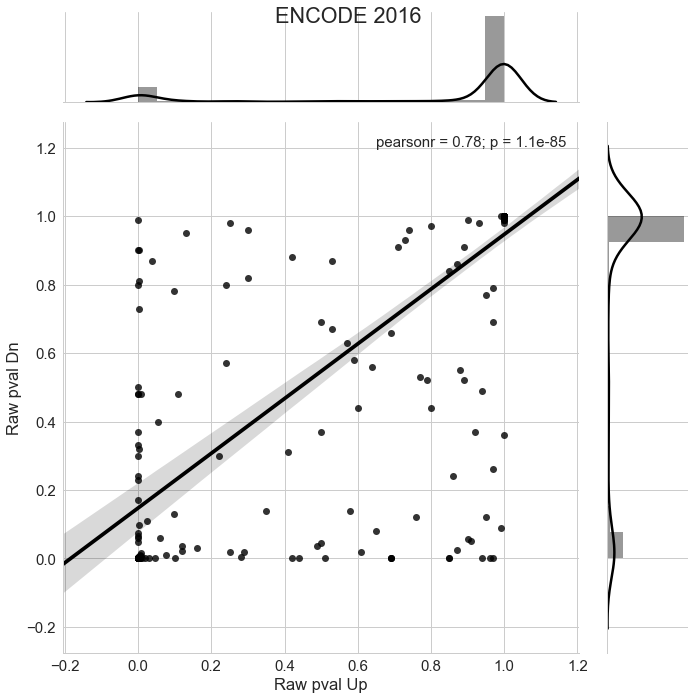

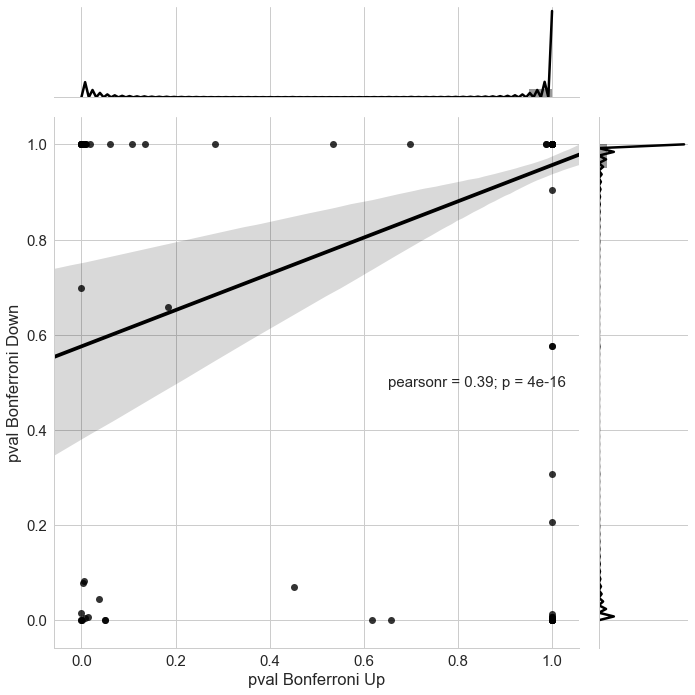

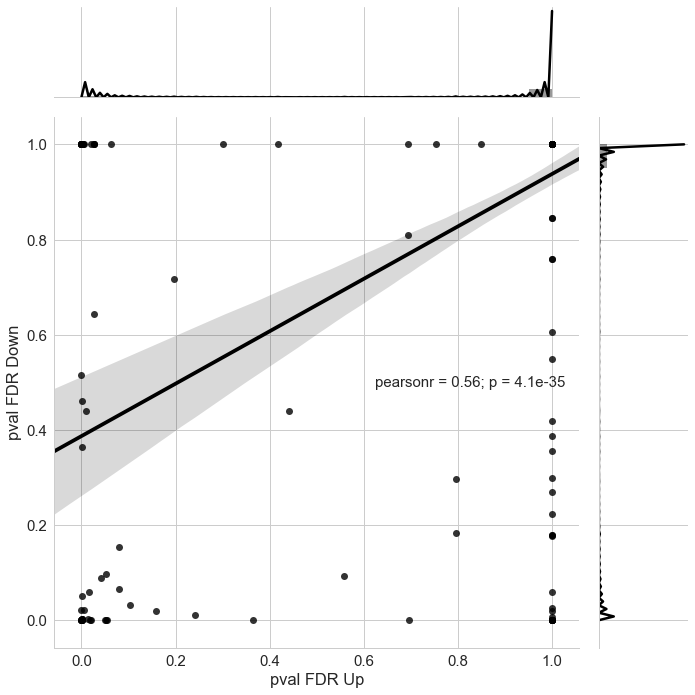

In [146]:
#fig, axs = plt.subplots(1,2)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

sns.jointplot('pval16UP', 'pval16DN', data=enc, kind="reg", color=
             'k', size=10 ) 
plt.xlabel("Raw pval Up")
plt.ylabel("Raw pval Dn") 
sns.plt.suptitle('ENCODE 2016')
plt.tight_layout()

sns.jointplot('pval16BFup', 'pval16BFdn', data=enc, kind="reg",color=
             'k', size=10,  ) 
plt.xlabel("pval Bonferroni Up")
plt.ylabel("pval Bonferroni Down") 
plt.tight_layout()

sns.jointplot('pval16FDRup', 'pval16FDRdn', data=enc, kind="reg",color=
             'k',size=10, ) 
plt.xlabel("pval FDR Up")
plt.ylabel("pval FDR Down") 
plt.tight_layout()

# ChEA

In [125]:
chea = pd.read_csv("/Users/CArol/Desktop/arquivoNovo/chea_clean.csv")
chea.head()

,Unnamed: 0,X,listAup,ListBup,overlapUP,pvalueUP,X.1,listAdn,ListBdn,overlapDN,pvaldn,overlapTotal,pvalBFup,pvalBFdn,pvalFDRup,pvalFDRdn,lg10up,lg10dn
0,1,"AR_1,creeds15gene_2194",300,351,11,9.100000e-03,"AR_1,creeds15$gene_2194",300,247,17,5.600000e-08,28,1.000000e+00,1.007440e-04,8.024951e-02,1.831709e-06,-2.040959,-7.251812
1,2,"E2F1_5,creeds15gene_1129",4174,350,172,8.600000e-38,"E2F1_5,creeds15$gene_1129",4174,251,118,3.500000e-24,290,1.547140e-34,6.296500e-21,7.735700e-35,6.996111e-22,-37.065502,-23.455932
2,3,"MYC_10,creeds15gene_712",3870,228,52,2.600000e-02,"MYC_10,creeds15$gene_712",3870,371,218,7.600000e-72,270,1.000000e+00,1.367240e-68,1.948917e-01,1.367240e-68,-1.585027,-71.119186
3,4,"E2F1_5,creeds15gene_998",4174,304,133,2.000000e-23,"E2F1_5,creeds15$gene_998",4174,298,121,3.000000e-18,254,3.598000e-20,5.397000e-15,4.497500e-21,4.151538e-16,-22.698970,-17.522879
4,5,"HNF4A_2,creeds15gene_577",6085,346,146,3.400000e-09,"HNF4A_2,creeds15$gene_577",6085,255,107,5.500000e-07,253,6.116600e-06,9.894500e-04,2.265407e-07,1.522231e-05,-8.468521,-6.259637


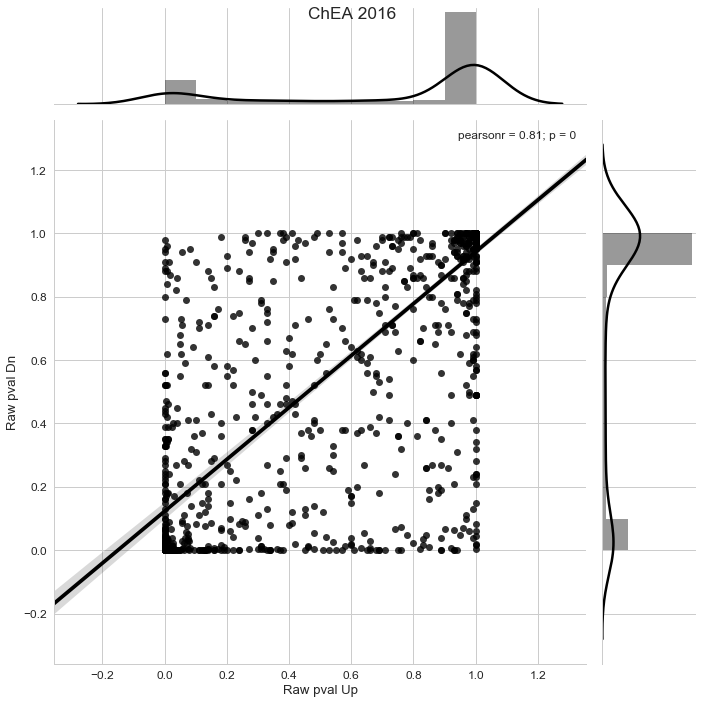

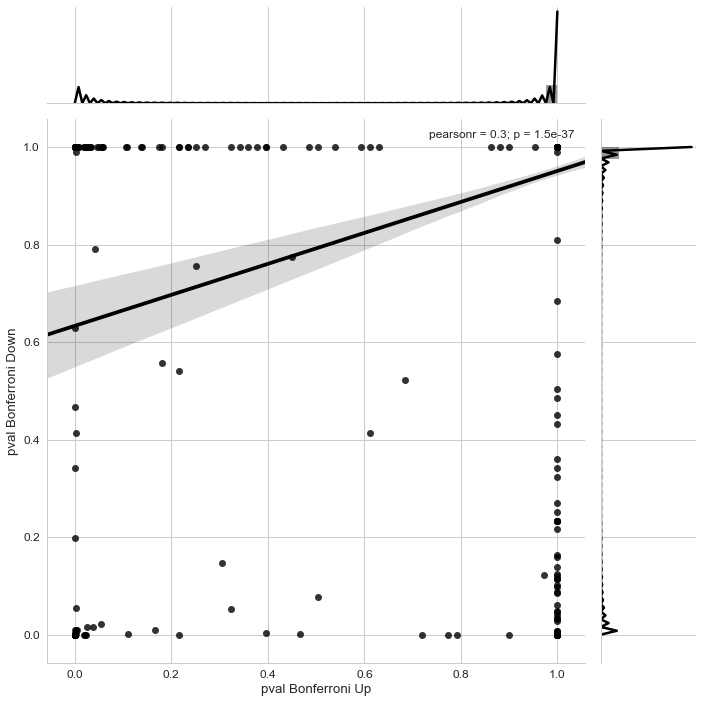

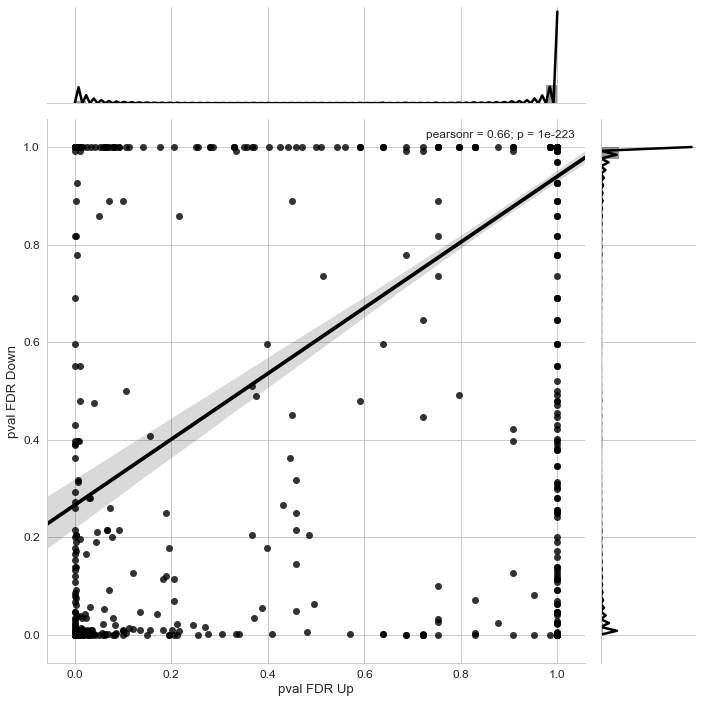

In [147]:
#fig, axs = plt.subplots(1,2)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

sns.jointplot('pvalueUP', 'pvaldn', data=chea, kind="reg", color='k', size=10) 
plt.xlabel("Raw pval Up")
plt.ylabel("Raw pval Dn") 
sns.plt.suptitle('ChEA 2016')
plt.tight_layout()

sns.jointplot('pvalBFup', 'pvalBFdn', data=chea, kind="reg",color='k', size=10,  ) 
plt.xlabel("pval Bonferroni Up")
plt.ylabel("pval Bonferroni Down") 
plt.tight_layout()

sns.jointplot('pvalFDRup', 'pvalFDRdn', data=chea, kind="reg",color=
             'k',size=10, ) 
plt.xlabel("pval FDR Up")
plt.ylabel("pval FDR Down") 
plt.tight_layout()